In [1]:
import nevis
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

nevis.download_os_terrain_50()
f = nevis.linear_interpolant()
x_max, y_max = nevis.dimensions()

Downloaded, unpacked, and processed file already found: Skipping.


In [2]:
from scipy.optimize import minimize

def run_opt(xatol, fatol, seed, boundaries):
    def wrapper(x):
        points_visited.append(x)
        return -f(*x)

    points_visited = []

    x1, x2, y1, y2 = boundaries
    np.random.seed(seed)
    a = np.random.rand() * (x2 - x1) + x1
    b = np.random.rand() * (y2 - y1) + y1

    result = minimize(
        wrapper,
        x0=(a, b),
        bounds=[(x1, x2), (y1, y2)],
        method='Nelder-Mead',
        options={'xatol': xatol, 'fatol': fatol}
    )
    z = -result.fun
    return z, len(points_visited)

def run_exps(xatol, fatol, boundaries, run):
    zs = []
    evals = []
    for i in range(run):
        z, e = run_opt(xatol, fatol, i, boundaries)
        zs.append(z)
        evals.append(e)

    return np.mean(zs), np.std(zs), np.mean(evals), np.std(evals)


In [3]:
xatol_values = [0.1, 1, 5, 10, 20]
fatol_values = [0.1, 0.2, 1]

res = []

for xatol in xatol_values:
    for fatol in fatol_values:
        for problem in ['schiehallion', 'macdui']:
            _, boundaries = eval(f'nevis.{problem}()')
            a, b, c, d = run_exps(xatol, fatol, boundaries, 5000)
            res.append({
                'xatol': xatol,
                'fatol': fatol,
                'problem': problem,
                'height_mean': a,
                'height_std': b,
                'eval_mean': c,
                'eval_std': d
            })

In [4]:
df = pd.DataFrame(res)

In [5]:
macdui_df = df[df["problem"] == "macdui"]
macdui_df

,xatol,fatol,problem,height_mean,height_std,eval_mean,eval_std
1,0.1,0.1,macdui,1018.152295,233.829723,91.0156,34.187866
3,0.1,0.2,macdui,1018.152295,233.829723,91.0156,34.187866
5,0.1,1.0,macdui,1018.152295,233.829723,91.0156,34.187866
7,1.0,0.1,macdui,1018.101756,233.828204,72.3120,24.754997
9,1.0,0.2,macdui,1018.101043,233.827671,72.2066,24.732988
11,1.0,1.0,macdui,1018.101022,233.827655,72.2008,24.733242
13,5.0,0.1,macdui,1018.006474,233.856392,60.7968,19.540714
15,5.0,0.2,macdui,1017.986263,233.843861,59.9132,19.191958
17,5.0,1.0,macdui,1017.963329,233.828845,59.3382,18.939657
19,10.0,0.1,macdui,1017.972765,233.849792,56.9404,18.304602


Text(0.5, 1.0, 'scipy Nelder-Mead on Macdui problem with different xatol and fatol')

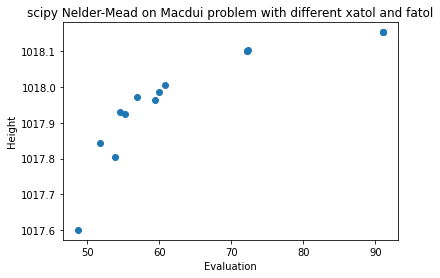

In [6]:
plt.scatter(macdui_df['eval_mean'], macdui_df['height_mean'])
plt.ylabel('Height')
plt.xlabel('Evaluation')
plt.title('scipy Nelder-Mead on Macdui problem with different xatol and fatol')

In [7]:
schiehallion_df = df[df["problem"] != "macdui"]
schiehallion_df

,xatol,fatol,problem,height_mean,height_std,eval_mean,eval_std
0,0.1,0.1,schiehallion,998.832361,185.223648,78.6234,16.888409
2,0.1,0.2,schiehallion,998.832361,185.223648,78.6234,16.888409
4,0.1,1.0,schiehallion,998.832361,185.223648,78.6234,16.888409
6,1.0,0.1,schiehallion,998.739676,185.204980,65.3328,14.390693
8,1.0,0.2,schiehallion,998.714884,185.194274,63.3776,13.850033
10,1.0,1.0,schiehallion,998.706895,185.190709,62.6206,13.640464
12,5.0,0.1,schiehallion,998.547515,185.339559,62.1058,14.961892
14,5.0,0.2,schiehallion,998.373008,185.403422,58.0978,13.965752
16,5.0,1.0,schiehallion,997.876436,185.432097,51.7984,11.800278
18,10.0,0.1,schiehallion,998.531121,185.340431,61.6726,15.288460


Text(0.5, 1.0, 'scipy Nelder-Mead on Schiehallion problem with different xatol and fatol')

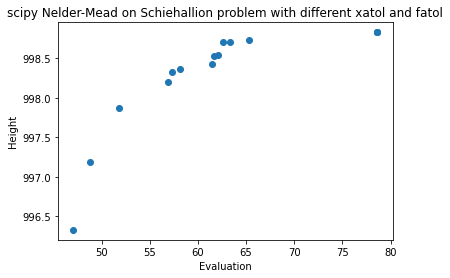

In [8]:
plt.scatter(schiehallion_df['eval_mean'], schiehallion_df['height_mean'],)
plt.ylabel('Height')
plt.xlabel('Evaluation')
plt.title('scipy Nelder-Mead on Schiehallion problem with different xatol and fatol')